In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe_connected'
pio.renderers.default = 'iframe_connected'

<h1 style="font-size:60px; font-weight:bold;"> Project: </h1>

# College Student Placement EDA Analysis 

In [2]:
df=pd.read_csv(r"/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [4]:
df.shape

(10000, 10)

In [5]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


# Data Cleaning & Handling

In [6]:
df.isna().sum()
df.duplicated().sum()

0

In [7]:
df.drop(columns=["College_ID"],inplace=True)

# EDA & Visualization

## Histogram Distribution Charts

In [8]:
df.columns

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

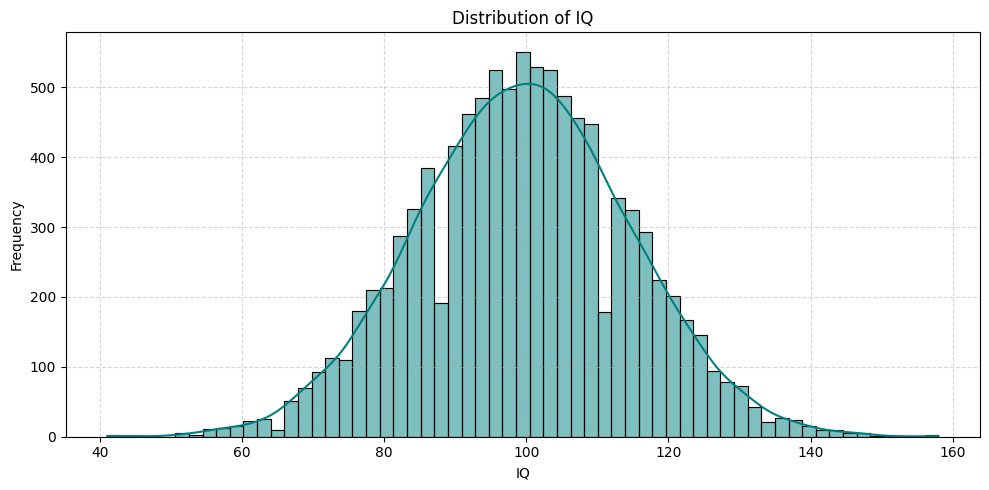

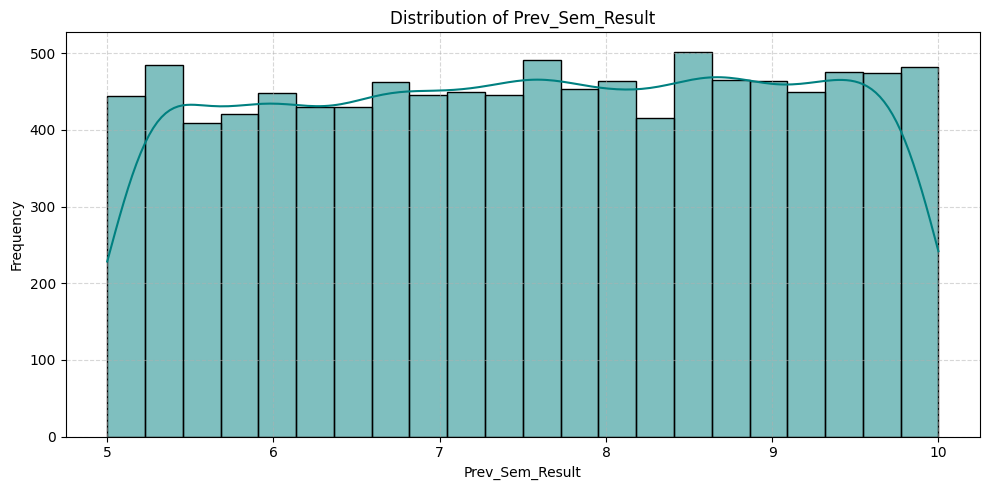

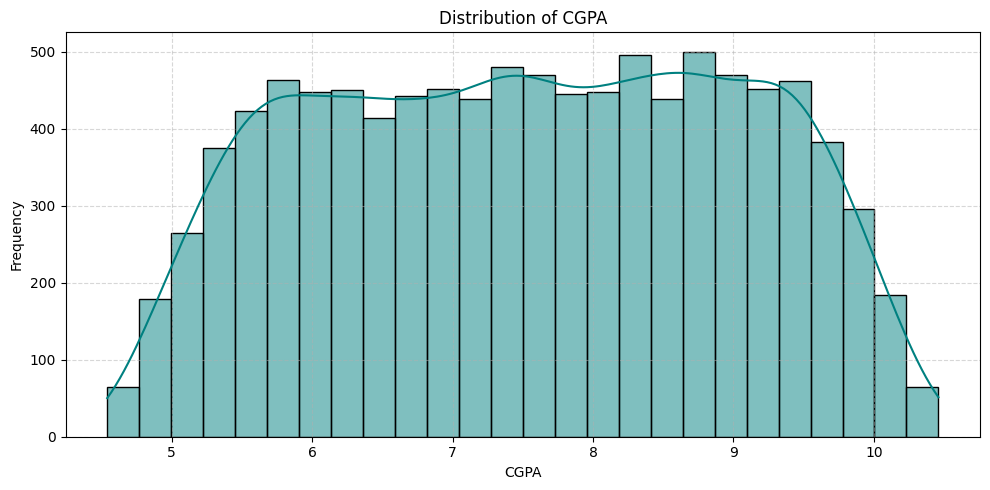

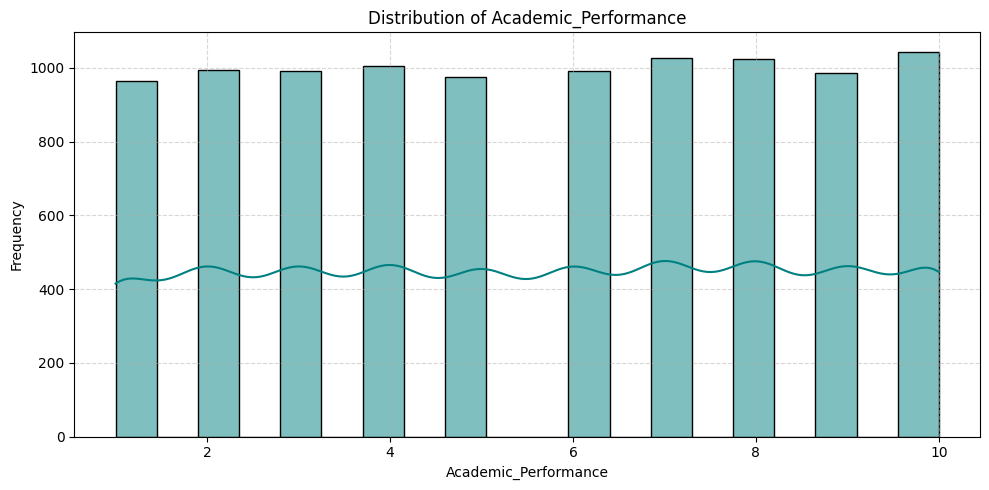

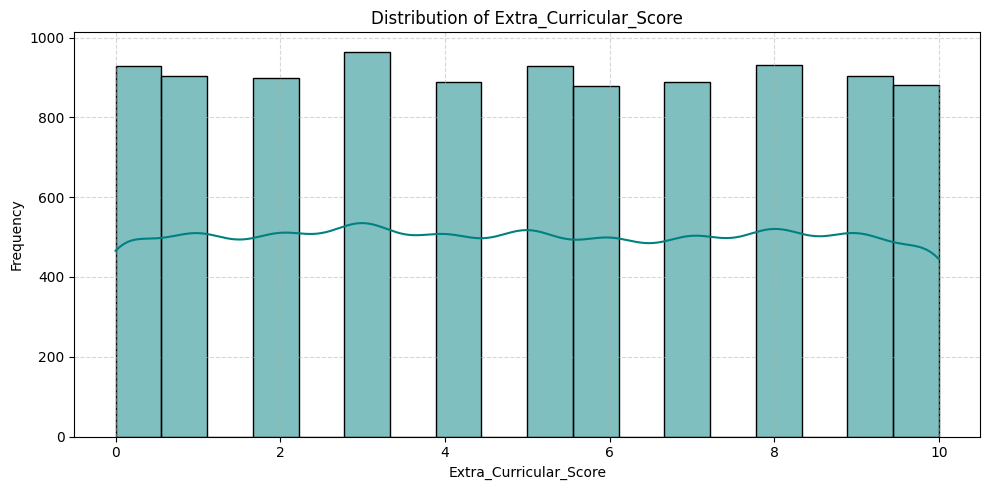

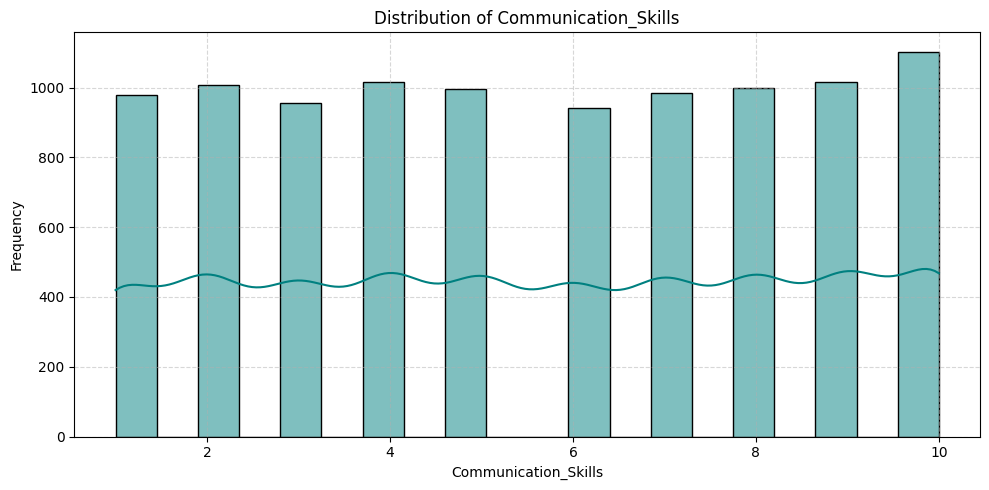

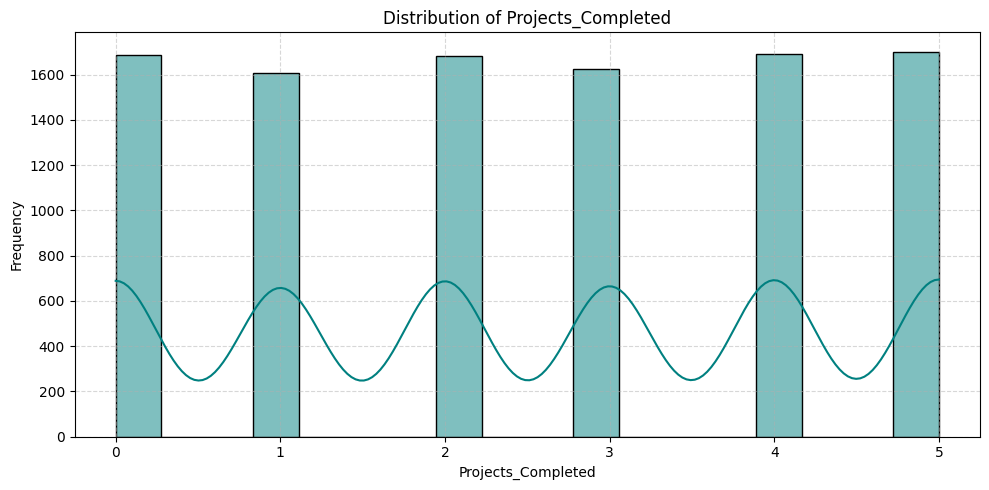

In [9]:
numeric_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
                'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color='teal', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


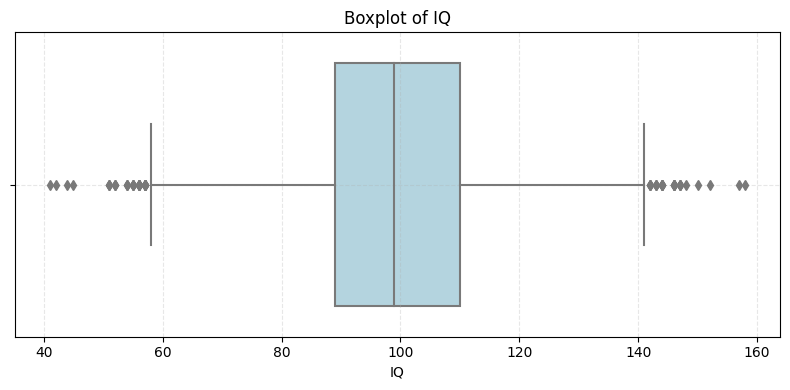

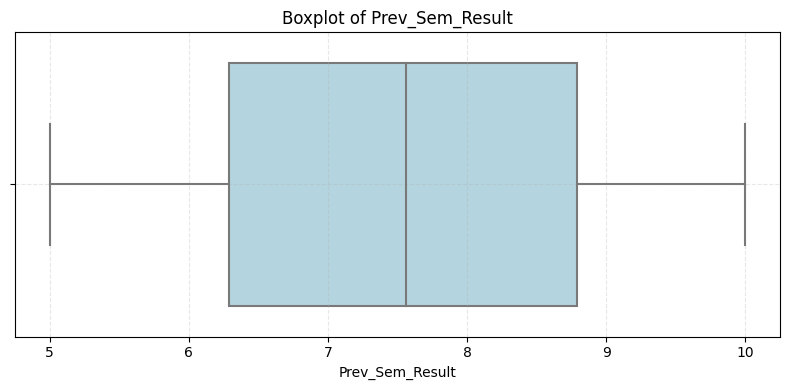

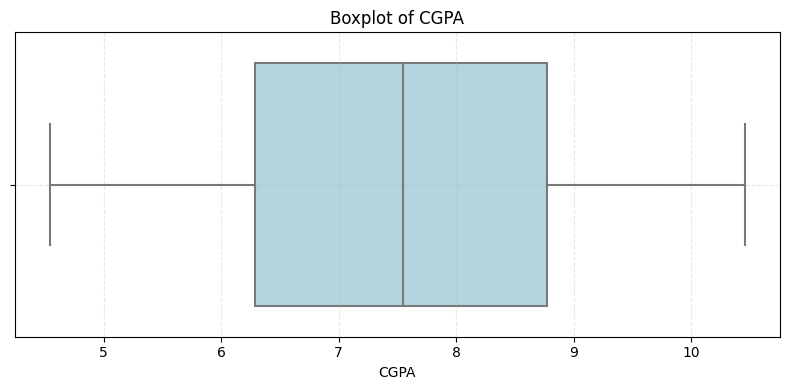

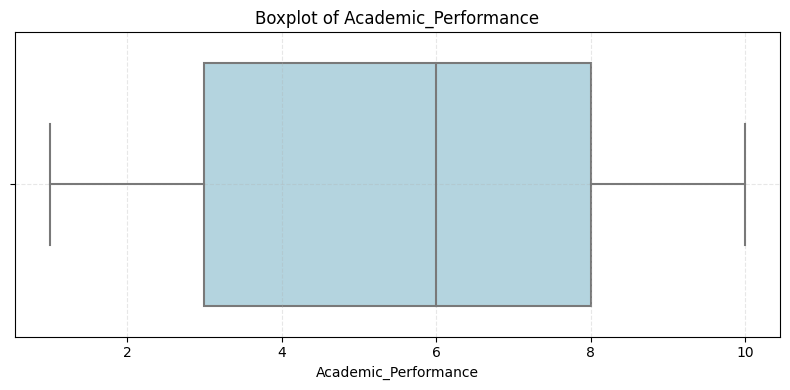

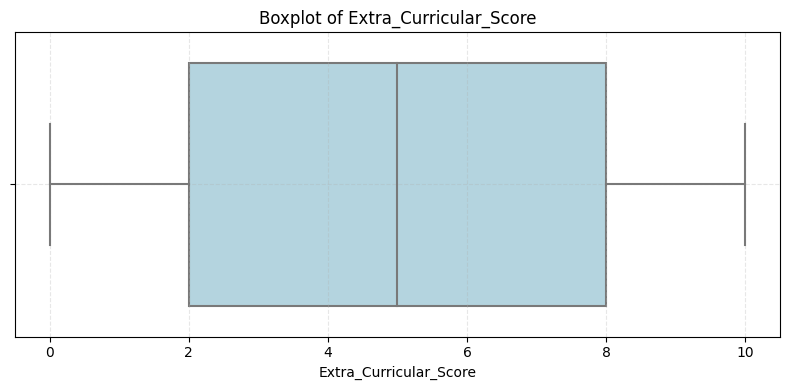

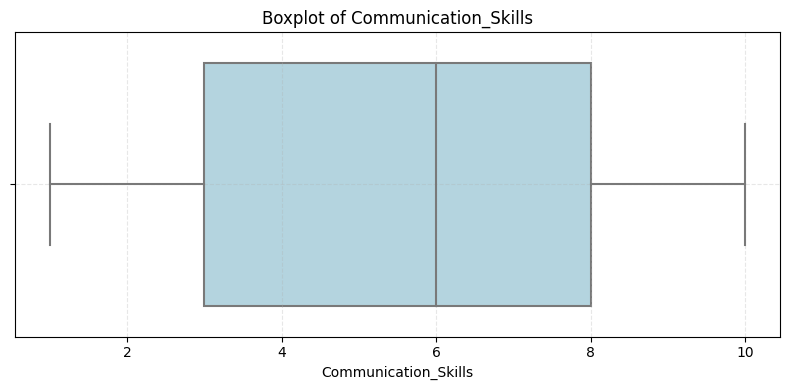

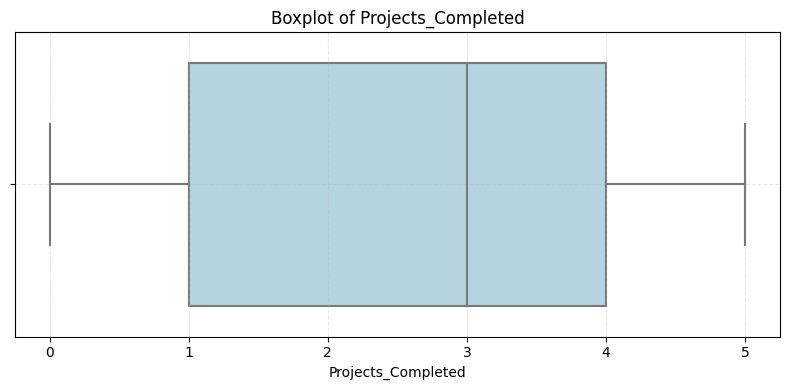

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


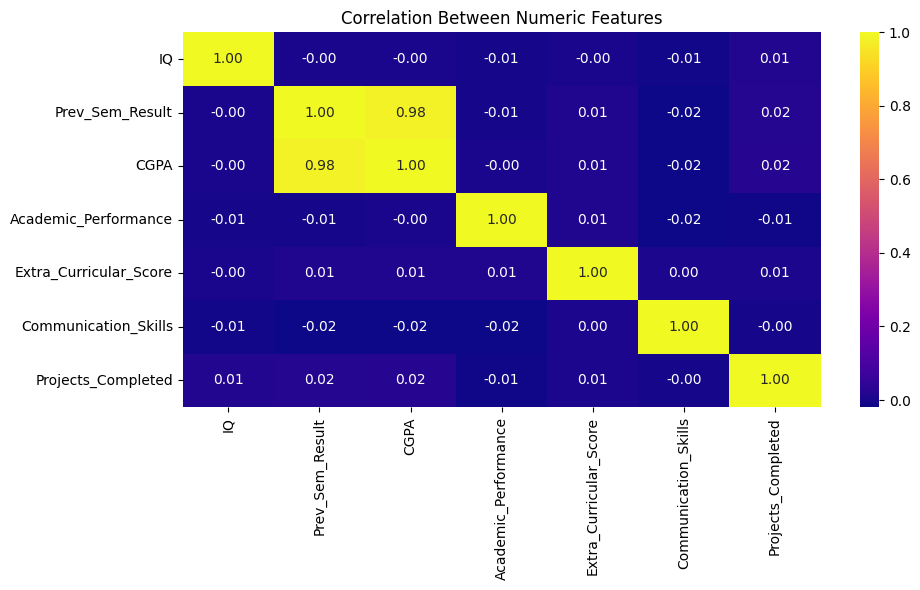

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()


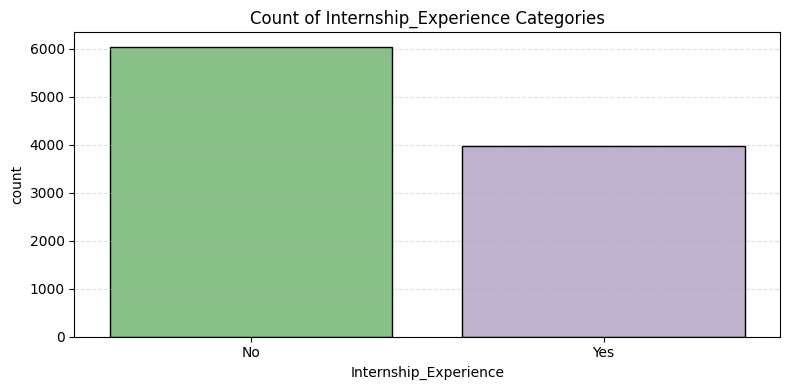

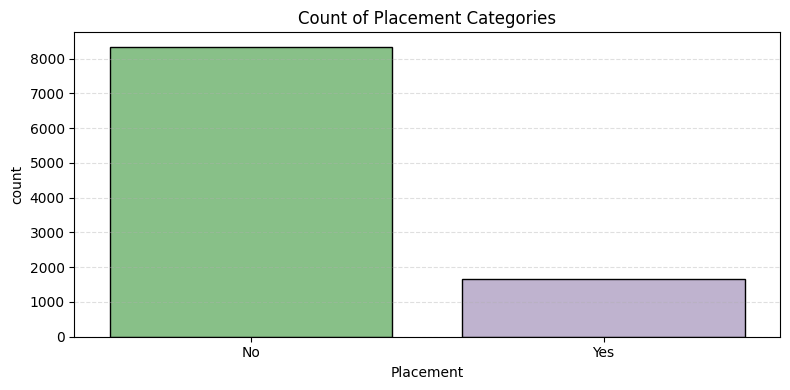

In [12]:
categorical_cols = ['Internship_Experience', 'Placement']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Accent',edgecolor="black")
    plt.title(f'Count of {col} Categories')
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


In [13]:
fig = px.violin(df, x='Internship_Experience', y='CGPA', box=True,
                points='all', color='Internship_Experience',
                title='CGPA Distribution by Internship Experience')
fig.show()


In [14]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [15]:

classifi_pr=df.groupby(["Academic_Performance","Placement"]).size().reset_index(name="Count")
classifi_pr
fig = px.bar(
    classifi_pr,
    x="Academic_Performance",
    y="Count",
    color="Placement",
    barmode="group",
    title="Placement Count by Academic Performance",
    labels={"Academic_Performance": "Academic Performance", "Count": "Count"}
)
fig.show()

In [16]:
df

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,119,8.41,8.29,4,No,1,8,0,Yes
9996,70,9.25,9.34,7,No,0,7,2,No
9997,89,6.08,6.25,3,Yes,3,9,5,No
9998,107,8.77,8.92,3,No,7,5,1,No


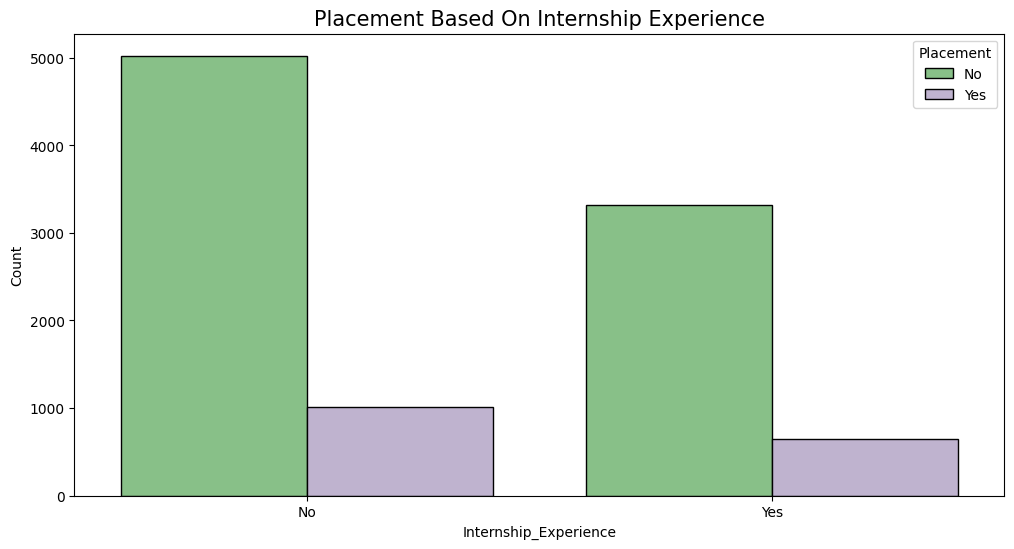

In [17]:
classifi_itr=df.groupby(["Internship_Experience","Placement"]).size().reset_index(name="Count")
classifi_itr
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_itr,x="Internship_Experience",y="Count",hue="Placement",palette="Accent",edgecolor="black")
plt.title("Placement Based On Internship Experience",size=15)
plt.show()

In [18]:
import plotly.express as px

fig = px.scatter(df, x='CGPA', y='Communication_Skills',
                 color='Placement',
                 hover_data=['IQ', 'Projects_Completed', 'Extra_Curricular_Score'],
                 title='CGPA vs Communication Skills by Placement Status')
fig.show()


In [19]:
fig = px.parallel_coordinates(df,
    dimensions=['IQ', 'CGPA', 'Prev_Sem_Result', 'Academic_Performance'],
    color='Projects_Completed',
    color_continuous_scale=px.colors.sequential.Tealgrn,
    title="Parallel Coordinates: Academic Metrics & Project Completion")
fig.show()

In [20]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


## Animation Interactive Visualization

In [21]:
fig = px.scatter(df, x='CGPA', y='Academic_Performance',
                 animation_frame='Projects_Completed',  # Replace with time-like variable if available
                 color='Placement',
                 title='CGPA vs Performance Over Project Completion')
fig.show()
